# Rendering and Animation

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import numpy as np
import pandas as pd 
current_folder = Path.cwd()
parent_folder = current_folder.parent
sys.path.insert(0, str(parent_folder))

from rplh.rendering.render_state import *
from rplh.rendering.animations import *

# Rendering of States

In [2]:

import os
import json

# Define the directory containing the JSON files
directory = "C:/Users/huang/Multi-Agency/RPLH_new/RPLH/demos/converging_samples/rplh_efficient_1/response"

# Initialize an empty list to store the loaded data
action_list_raw = []

for i in range(13):
    file_path = os.path.join(directory, f'response{i}.json')
    with open(file_path, 'r') as file:
        action_list_raw.append(json.load(file))


In [3]:
pg_state_0 = {"0.5_0.5": ["target_blue", "target_blue", "target_green", "target_green"], "0.5_1.5": ["box_blue", "box_red", "box_purple", "target_purple", "box_purple", "box_orange", "target_orange"], "1.5_0.5": ["box_red", "target_red", "box_green", "box_green", "target_purple"], "1.5_1.5": ["box_blue", "target_red", "target_purple", "box_purple"]}
#action_list_raw = [action_0, action_1]
box_map, action_list = trans_data(pg_state_0, action_list_raw)
print("box map:", box_map)
print("-------------------------------------------------------------------------------------------")
print("action_list:", action_list)


box map: {(0.5, 0.5): [['target', 'blue', 0], ['target', 'blue', 1], ['target', 'green', 2], ['target', 'green', 3]], (0.5, 1.5): [['box', 'blue', 4], ['box', 'red', 5], ['box', 'purple', 6], ['target', 'purple', 7], ['box', 'purple', 8], ['box', 'orange', 9], ['target', 'orange', 10]], (1.5, 0.5): [['box', 'red', 11], ['target', 'red', 12], ['box', 'green', 13], ['box', 'green', 14], ['target', 'purple', 15]], (1.5, 1.5): [['box', 'blue', 16], ['target', 'red', 17], ['target', 'purple', 18], ['box', 'purple', 19]]}
-------------------------------------------------------------------------------------------
action_list: [{(0.5, 1.5): ('box_blue', (1.5, 1.5)), (1.5, 1.5): ('box_purple', 'target_purple')}, {(0.5, 1.5): ('box_red', (1.5, 1.5)), (1.5, 0.5): ('box_red', 'target_red')}, {(0.5, 1.5): ('box_purple', 'target_purple'), (1.5, 0.5): ('box_green', (0.5, 0.5)), (1.5, 1.5): ('box_blue', (0.5, 1.5))}, {(0.5, 0.5): ('box_green', 'target_green'), (0.5, 1.5): ('box_orange', 'target_orange

In [4]:
# state = {"0.5_0.5": [], 
#      "0.5_1.5": [], 
#      "1.5_0.5": [], 
#      "1.5_1.5": []}

# render_state, a_lst = trans_data(state, []) 

# render_graph(box_map)

In [5]:





# action_0 = {'Agent[0.5, 0.5]': 'move(box_blue, target_blue)', 
#             'Agent[0.5, 1.5]': 'move(box_orange, square[0.5, 0.5])', 
#             'Agent[1.5, 0.5]': 'move(box_green, target_green)', 
#             'Agent[1.5, 1.5]': 'move(box_blue, square[0.5, 1.5])'
#             }

# # render_state_1, a_lst = trans_data(state, [transform_action(action_0)])

# state = {"0.5_0.5": ["target_orange", "box_orange"], 
#      "0.5_1.5": ["target_green", "target_blue", "box_blue"], 
#      "1.5_0.5": ["box_green"], 
#      "1.5_1.5": []}

# render_state, a_lst = trans_data(state, []) 

# render_graph(render_state)

# Rendering Actions + States

In [6]:
# render_graph(box_map)

In [7]:
# action_list

# Rendering Animations

In [31]:
fig, df = render_animate(box_map, action_list, num_frames = 5)

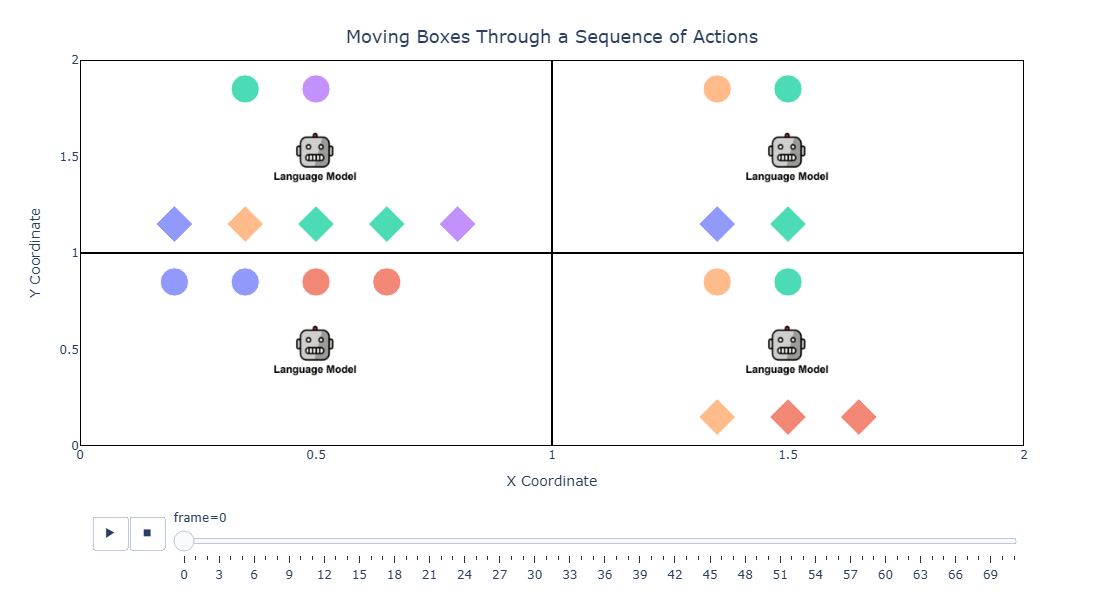

In [32]:
fig.show()